Haré la distribución de las variables más importantes de los hits de beersheba para ver que todo funciona bien, comparando con las distribuciones de MC

In [2]:
import tables  as tb
import pandas  as pd
import sqlite3 as sql
import numpy   as np

import matplotlib.pyplot    as plt
import matplotlib           as mpl
from   mpl_toolkits.mplot3d import Axes3D

from invisible_cities.io import mcinfo_io as mio
from invisible_cities.io import dst_io    as dio

In [3]:
dir_bersh = '/Users/mperez/NEXT/bersh_prod/prod_example/beersheba_example.h5'

In [4]:
with tb.open_file(dir_bersh) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/beersheba_example.h5 (File) ''
Last modif.: 'Sun Oct  3 14:41:51 2021'
Object Tree: 
/ (RootGroup) ''
/DECO (Group) ''
/DECO/Events (Table(2076860,), shuffle, zlib(4)) 'Deconvolved hits'
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/MC (Group) ''
/MC/event_mapping (Table(545,), shuffle, zlib(4)) ''
/MC/generators (Table(0,), shuffle, zlib(4)) ''
/MC/hits (Table(136630,), shuffle, zlib(4)) ''
/MC/particles (Table(16461,), shuffle, zlib(4)) ''
/Run (Group) ''
/Run/events (Table(545,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(545,), shuffle, zlib(4)) 'run info table'
/Summary (Group) ''
/Summary/Events (Table(545,), shuffle, zlib(4)) 'Event summary information'



Tomo los hits beersheba

In [5]:
df_hits_bersh = dio.load_dst(dir_bersh, 'DECO', 'Events')

In [6]:
df_hits_bersh

,event,npeak,X,Y,Z,E
0,0,0,-36.5,166.5,90.484500,0.000172
1,0,0,-35.5,164.5,90.484500,0.000193
2,0,0,-35.5,165.5,90.484500,0.000467
3,0,0,-35.5,166.5,90.484500,0.000567
4,0,0,-35.5,167.5,90.484500,0.000377
...,...,...,...,...,...,...
2076855,546,0,-59.5,151.5,361.644844,0.000306
2076856,546,0,-58.5,148.5,361.644844,0.000164
2076857,546,0,-58.5,149.5,361.644844,0.000245
2076858,546,0,-58.5,150.5,361.644844,0.000239


Tomo los hits MC

In [8]:
df_hits_MC = dio.load_dst(dir_bersh, 'MC', 'hits')
df_hits_MC

,event_id,particle_id,hit_id,x,y,z,time,energy,label
0,0,8,0,-33.248081,167.835648,91.880447,4.940380e+11,0.004775,ACTIVE
1,0,14,0,-35.777943,174.114822,100.386848,4.940380e+11,0.005104,ACTIVE
2,0,15,0,-35.779541,174.158096,100.414200,4.940380e+11,0.018491,ACTIVE
3,0,15,1,-35.773769,174.157593,100.412331,4.940380e+11,0.006187,ACTIVE
4,0,13,0,-33.585495,167.540771,91.943695,4.940380e+11,0.005346,ACTIVE
...,...,...,...,...,...,...,...,...,...
136625,546,25,0,-63.314819,162.468094,343.534027,1.719879e+10,0.002300,ACTIVE
136626,546,24,0,-38.623085,142.884171,353.445129,1.719879e+10,0.005898,ACTIVE
136627,546,24,1,-38.641624,142.901657,353.463531,1.719879e+10,0.007213,ACTIVE
136628,546,24,2,-38.651184,142.911407,353.459351,1.719879e+10,0.009467,ACTIVE


# Comparacion distribuciones beersheba vs MC

In [9]:
def hist_comparation(data, nbins, titles, xlabel, ylabel, figsize = (8, 8)):
    #Función para plotear varios histogramas y ver la comparación
    nplots = len(data)
    fig, axs = plt.subplots(nplots, figsize = figsize)
    for i in range(nplots):
        mean = np.mean(data[i])
        rms  = np.sqrt(sum(data[i] * data[i]) / len(data[i]))
        
        axs[i].hist(data[i], nbins[i])
        axs[i].set_title(titles[i])
        
        axs[i].plot([], [], label = 'mean = {:.5f}'.format(mean)) #naive way of making an open legend
        axs[i].plot([], [], label = 'rms  = {:.5f}'.format(rms))
        axs[i].legend()

    for ax in axs.flat:
        ax.set(xlabel = xlabel, ylabel = ylabel)

    fig.tight_layout()

## Energía de los hits

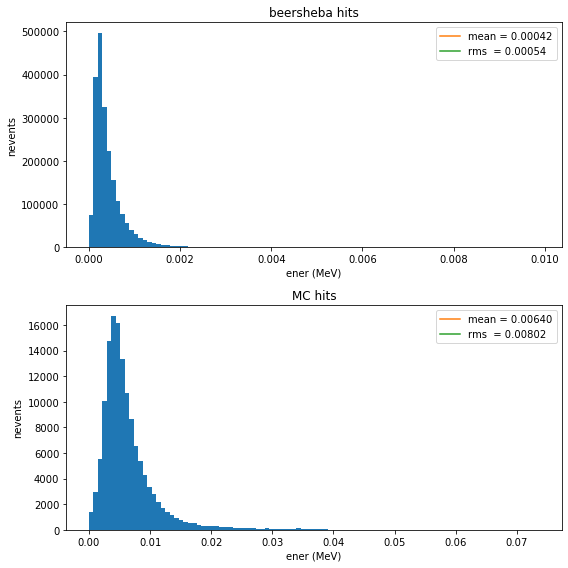

In [10]:
df_hits_bersh_ener = df_hits_bersh['E']
df_hits_MC_ener = df_hits_MC['energy']

hist_comparation([df_hits_bersh_ener, df_hits_MC_ener], [100, 100], ['beersheba hits', 'MC hits'], 'ener (MeV)', 'nevents')

Las distribuciones vemos que son muy similares. Entiendo que tiene sentido la diferencia en unidades de energía, ya que se están 'distribuyendo' unos 136600 hits de MC en 2076860 hits de beersheba reconstruidos, pero teniendo la misma energía. A continuación hago lo mismo con las energías de los eventos, que tiene más sentido.

## Energía de los eventos

Hago ahora la suma de los hits de cada evento para tener la energía del evento y comparo también

In [11]:
event_ener_bersh, event_ener_MC = [], []

for i in range(max(df_hits_bersh['event']) + 1):
    event_ener_bersh.append(sum(df_hits_bersh.loc[df_hits_bersh['event']    == i]['E']))
    event_ener_MC   .append(sum(df_hits_MC   .loc[df_hits_MC   ['event_id'] == i]['energy']))
    
event_ener_bersh, event_ener_MC = np.array(event_ener_bersh), np.array(event_ener_MC)

Los eventos 79 y 218 están vacíos (no solo en beersheba sino también en MC)

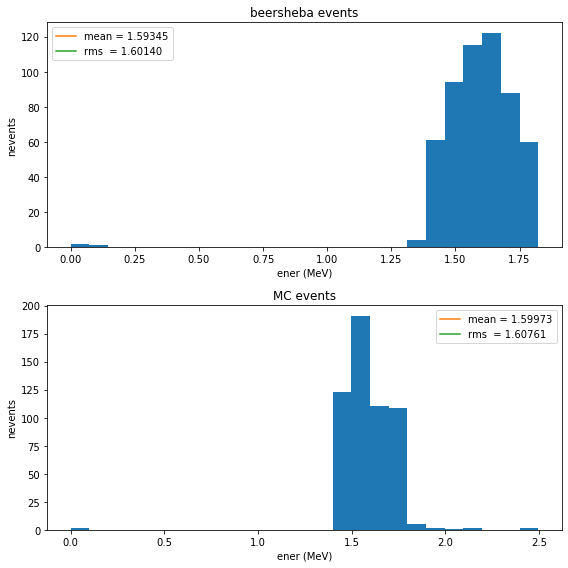

In [12]:
hist_comparation([event_ener_bersh, event_ener_MC], [25, 25], ['beersheba events', 'MC events'], 'ener (MeV)', 'nevents')

Vemos que media y rms coinciden bastante bien, por lo que parece que la producción funciona correctamente.

## Posiciones de los hits (x, y, z)

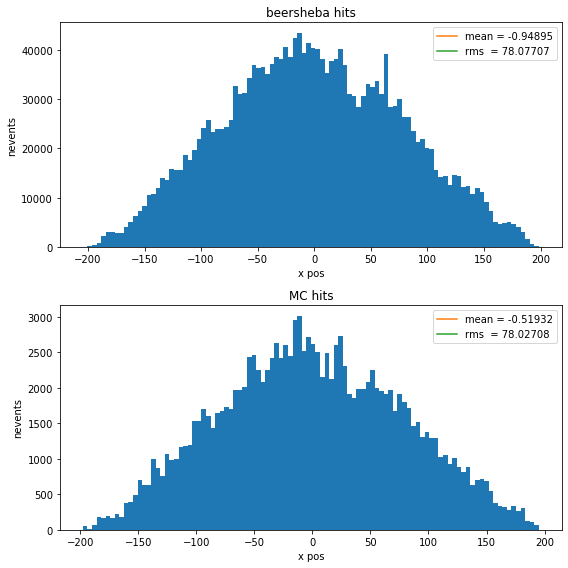

In [13]:
df_hits_bersh_x = df_hits_bersh['X']
df_hits_MC_x = df_hits_MC['x']

hist_comparation([df_hits_bersh_x, df_hits_MC_x], [100, 100], ['beersheba hits', 'MC hits'], 'x pos', 'nevents')

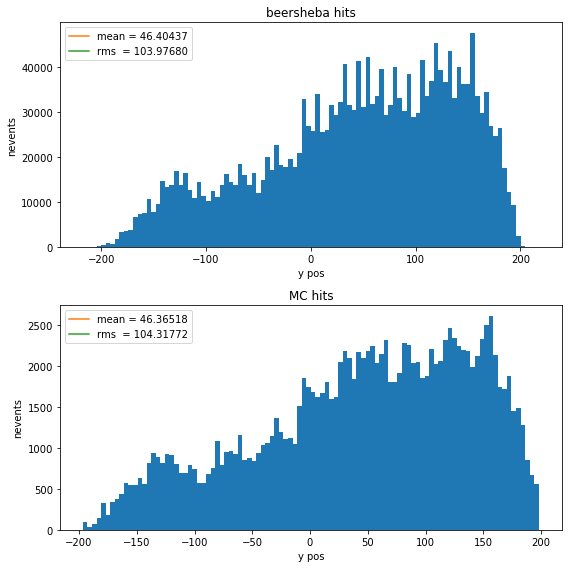

In [14]:
df_hits_bersh_y = df_hits_bersh['Y']
df_hits_MC_y = df_hits_MC['y']

hist_comparation([df_hits_bersh_y, df_hits_MC_y], [100, 100], ['beersheba hits', 'MC hits'], 'y pos', 'nevents')

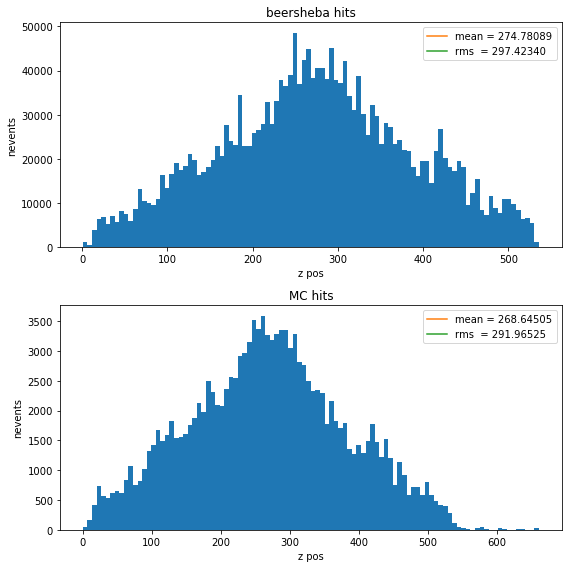

In [15]:
df_hits_bersh_z = df_hits_bersh['Z']
df_hits_MC_z = df_hits_MC['z']

hist_comparation([df_hits_bersh_z, df_hits_MC_z], [100, 100], ['beersheba hits', 'MC hits'], 'z pos', 'nevents')

Quizás lo más llamativo es que la cola de hits en z no se reconstruye... supongo que son hits más bien aislados y que el algoritmo pues ya omite